# Random walks

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
from melodic_contour import *
matplotlib.style.use('styles.mplstyle')

from sklearn.decomposition import PCA

In [2]:
def random_contour(lam, num_samples=50, n=10, p=0.5):
    length = max(3, np.random.poisson(lam=lam))
    contour = [np.random.randint(60,85)]
    for i in range(1, length):
        step = np.random.binomial(n, p) - n*p
        step = min(max(-12, step), 12)
        if (contour[i-1] + step > 84) or (contour[i-1] + step < 60):
            contour.append(contour[i-1] - step)
        else:
            contour.append(contour[i-1] + step)
            
    contour.append(contour[-1])
    c = Contour(contour)
    return c.interpolate(num_samples).pitches

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [3]:
meta = pd.read_csv('../data/contours/contours-1000-metadata.csv', index_col=0)

In [4]:
lam = meta['phrase_length'].mean()
contours = np.array([random_contour(lam) for _ in range(5000)])
contours = contours - contours.mean(axis=1)[:, np.newaxis]

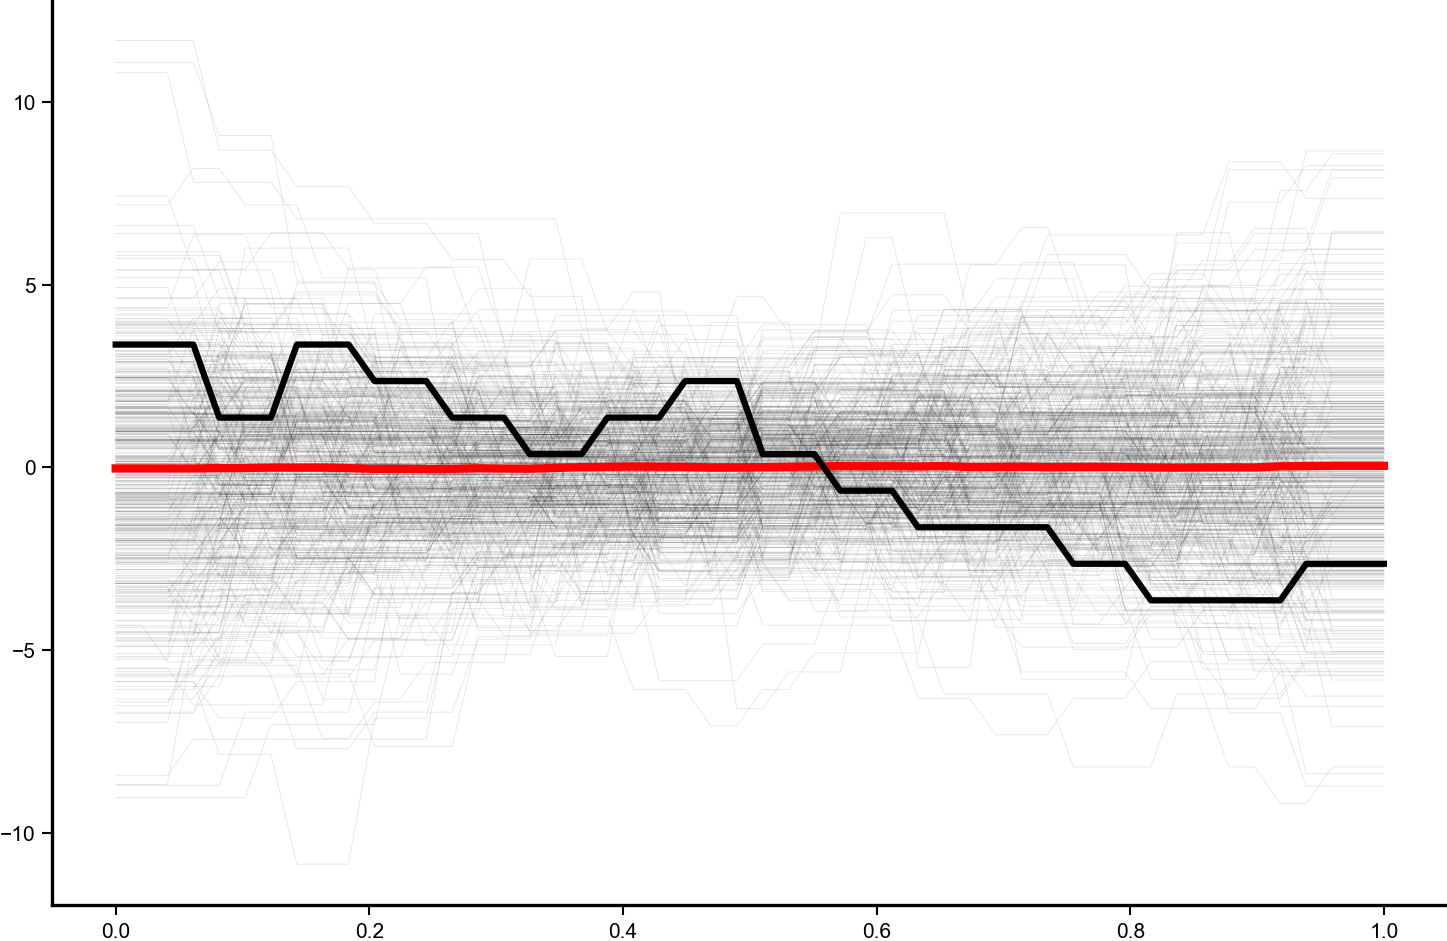

In [6]:
xs = np.linspace(0, 1, 50)
plt.plot(xs, contours[:500,:].T, 'k', lw=.2, alpha=.1)
plt.plot(xs, contours.mean(axis=0), 'r', lw=2);
plt.plot(xs, contours[0,:].T, 'k')

In [9]:
pca = PCA(n_components=9)
pca.fit(contours)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

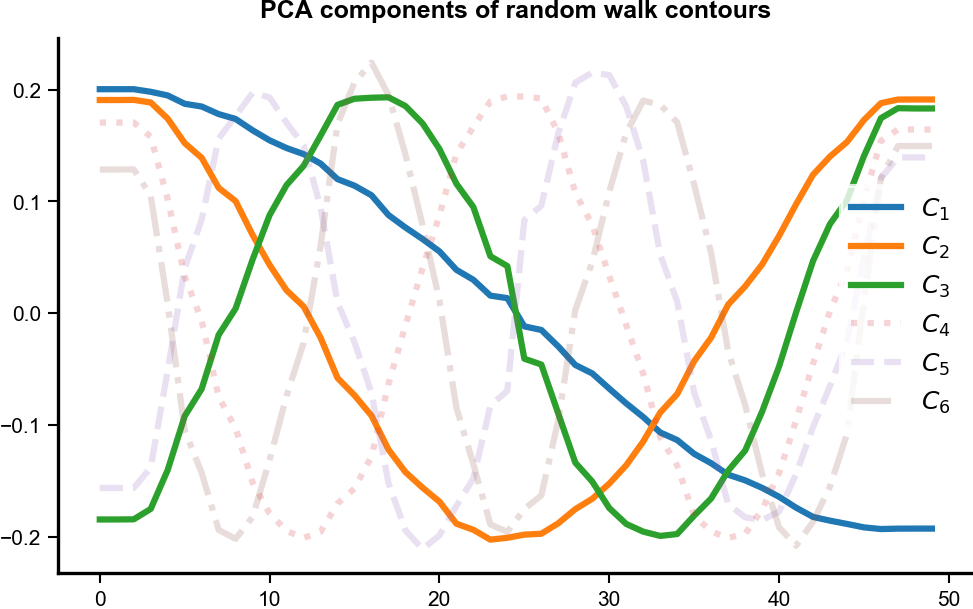

In [10]:
plt.figure(figsize=cm2inch(10,6))
plt.plot(pca.components_[0], label='$C_1$')
plt.plot(pca.components_[1], label='$C_2$')
plt.plot(pca.components_[2], label='$C_3$')
plt.plot(pca.components_[3], label='$C_4$', ls=':', alpha=.2)
plt.plot(pca.components_[4], label='$C_5$', ls='--', alpha=.2)
plt.plot(pca.components_[5], label='$C_6$', ls='-.', alpha=.2)
plt.legend()
plt.title('PCA components of random walk contours')
plt.savefig('../figures/pca-random-walk-contours.png')

## Cosines

In [12]:
def eig_vect(N, n):
    xs = np.arange(N)
    return np.cos(xs * np.pi * n / N)

In [17]:
eig_vect(50, i+1)

array([ 1.00000000e+00,  8.44327926e-01,  4.25779292e-01, -1.25333234e-01,
       -6.37423990e-01, -9.51056516e-01, -9.68583161e-01, -6.84547106e-01,
       -1.87381315e-01,  3.68124553e-01,  8.09016994e-01,  9.98026728e-01,
        8.76306680e-01,  4.81753674e-01, -6.27905195e-02, -5.87785252e-01,
       -9.29776486e-01, -9.82287251e-01, -7.28968627e-01, -2.48689887e-01,
        3.09016994e-01,  7.70513243e-01,  9.92114701e-01,  9.04827052e-01,
        5.35826795e-01,  5.51091060e-16, -5.35826795e-01, -9.04827052e-01,
       -9.92114701e-01, -7.70513243e-01, -3.09016994e-01,  2.48689887e-01,
        7.28968627e-01,  9.82287251e-01,  9.29776486e-01,  5.87785252e-01,
        6.27905195e-02, -4.81753674e-01, -8.76306680e-01, -9.98026728e-01,
       -8.09016994e-01, -3.68124553e-01,  1.87381315e-01,  6.84547106e-01,
        9.68583161e-01,  9.51056516e-01,  6.37423990e-01,  1.25333234e-01,
       -4.25779292e-01, -8.44327926e-01])

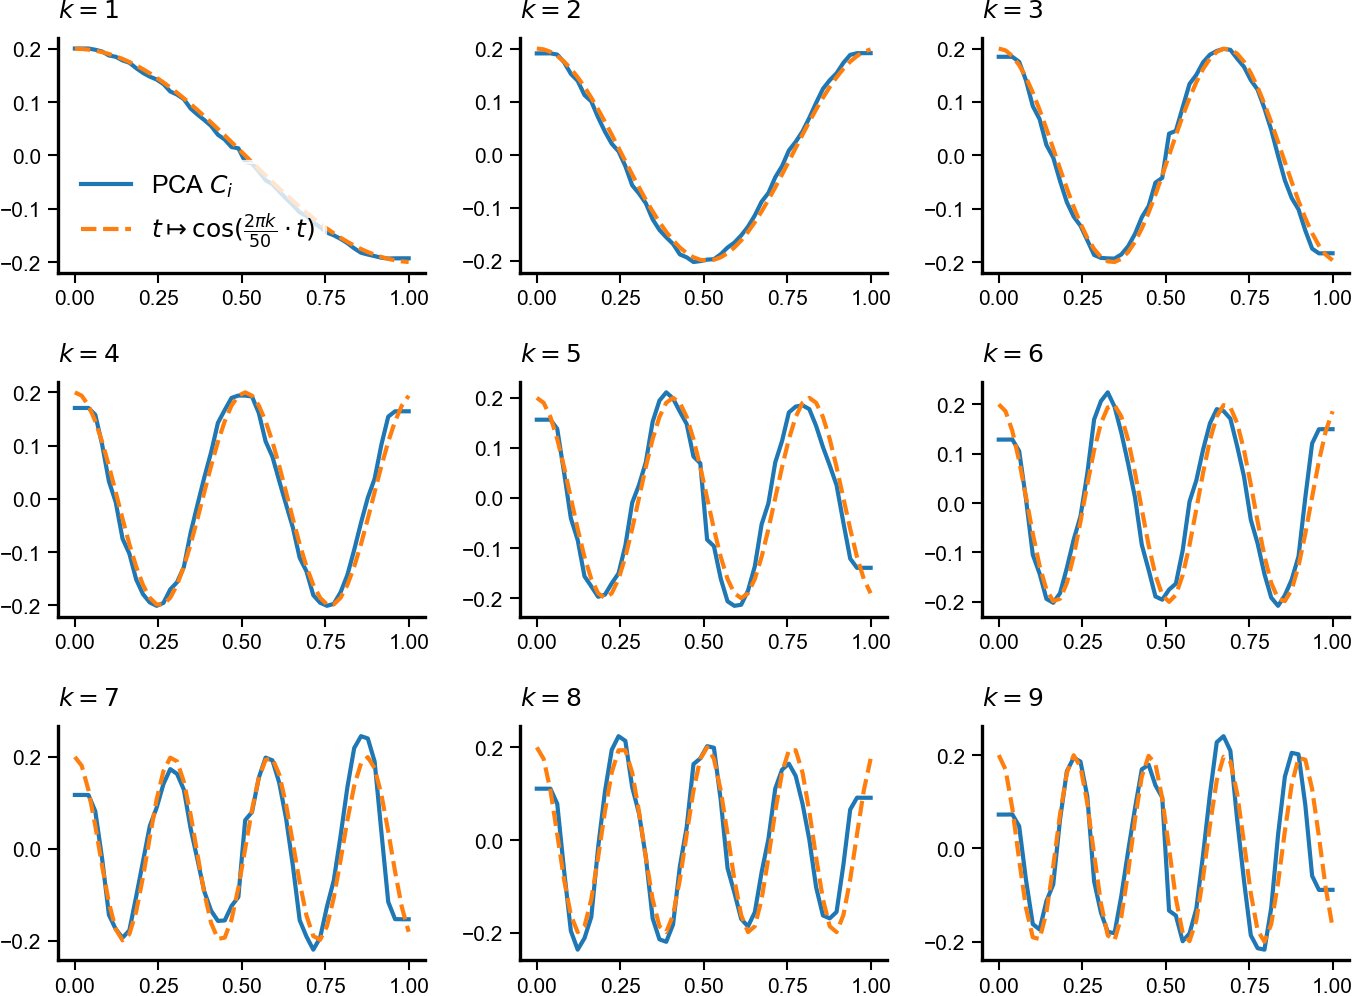

In [51]:
x = np.linspace(0, 1, 50)
plt.figure(figsize=cm2inch(12, 9))
corrections = [1, 1, -1, 1, -1, 1, 1, -1, -1]
pad = .15

for i in range(9):
    plt.subplot(int(f'33{i+1}'))
    component = corrections[i] * pca.components_[i]
    plt.plot(x, component, label=f'PCA $C_i$', lw=1)

    v = eig_vect(50, i+1)
    plt.plot(np.linspace(0, 1, 50), v / np.linalg.norm(v),
            label='$t \mapsto \cos(\\frac{2\pi k}{50}\cdot t)$',
            lw=1, ls='--')
    
    title(f'$k={i+1}$')
    if i == 0: plt.legend()
        
# plt.suptitle(f'PCA $C_i$ vs Fourier mode on random walk contours', y=1.02)
plt.tight_layout()
plt.savefig('../figures/pca-fourier.png')

## Chebyshev

In [62]:
T0 = lambda x: np.ones(x.shape)
T1 = lambda x: x
T2 = lambda x:  2 * x**2 - 1 
T3 = lambda x:  4 * x**3 - 3 * x
T4 = lambda x:  8 * x**4 - 8 * x**2 + 1
T5 = lambda x: 16 * x**5 - 20 * x**3 + 5 * x
T6 = lambda x: 32 * x**6 - 48 * x**4 + 18 * x**2 - 1
T7 = lambda x: 64 * x**7 - 112 * x**5 + 56 * x**3 - 7*x
T8 = lambda x: 128 * x**8 - 256 * x**6 + 160 * x**4 - 32*x**2 + 1
T9 = lambda x: 256 * x**9 - 576 * x**7 + 432 * x**5 - 120*x**3 + 9*x
chebyshev_polynomials = [T0, T1, T2, T3, T4, T5, T6, T7, T8, T9]

In [63]:
# xs = np.linspace(0, 1, 100)
# # plt.plot(xs, T0(2 * xs - 1))
# plt.plot(xs, T1(2 * xs - 1))
# plt.plot(xs, T2(2 * xs - 1))
# plt.plot(xs, T3(2 * xs - 1))
# plt.plot(xs, T4(2 * xs - 1))
# plt.plot(xs, T5(2 * xs - 1))

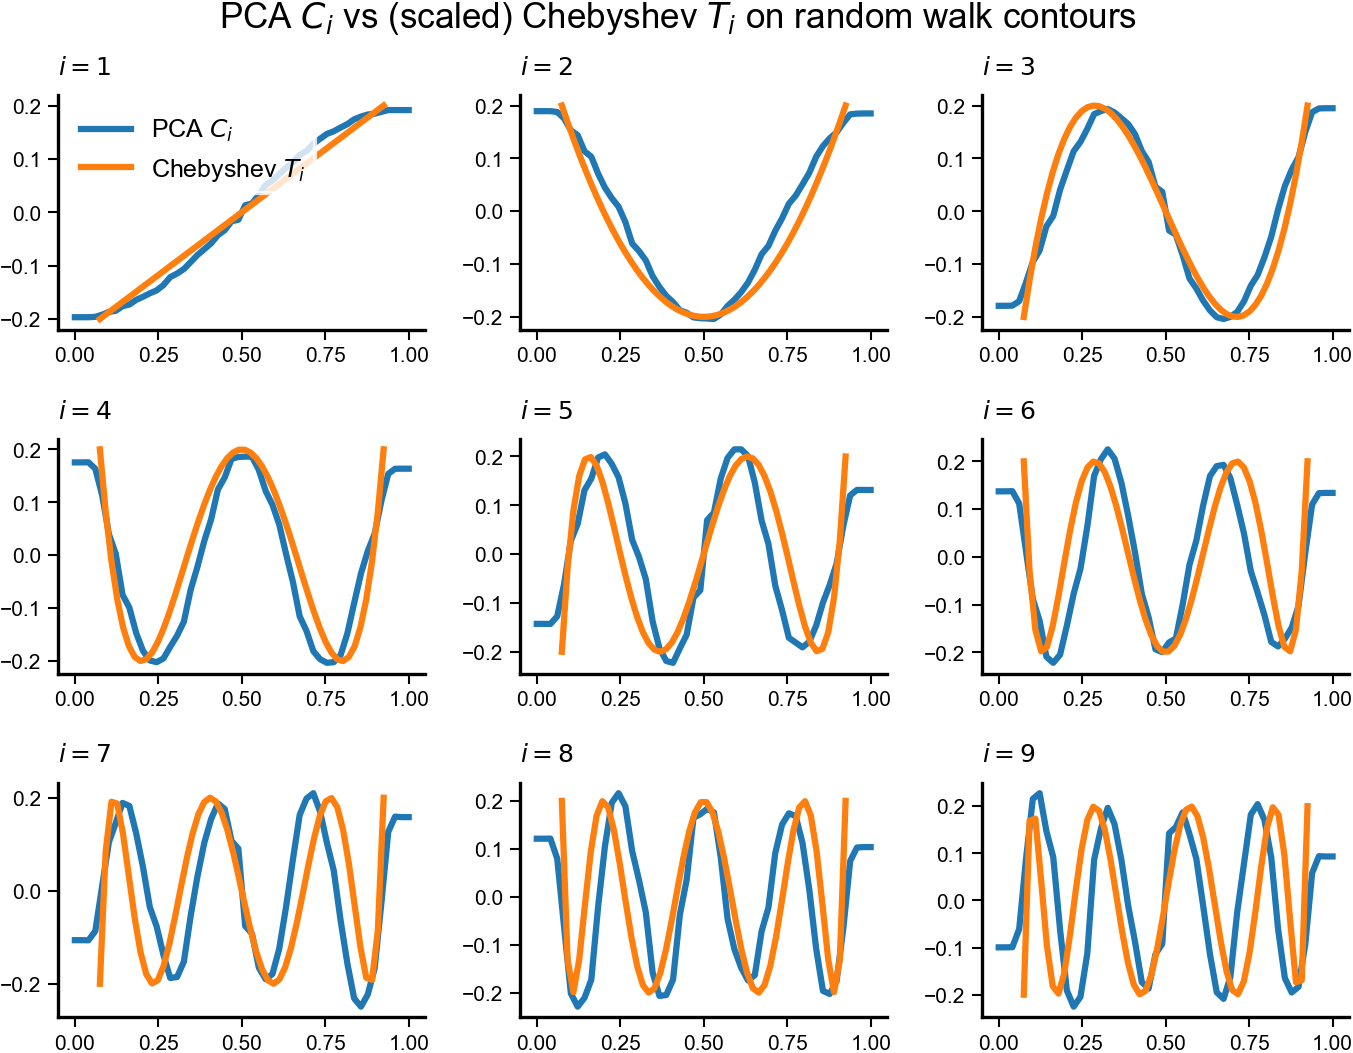

In [74]:
x = np.linspace(0, 1, 50)
plt.figure(figsize=cm2inch(12, 9))
corrections = [-1, 1, -1, 1, -1, -1, 1, -1, 1]
pad = .15

for i in range(9):
    plt.subplot(int(f'33{i+1}'))
    chebyshev = .2 * chebyshev_polynomials[i+1](2 * x - 1)
    component = corrections[i] * pca.components_[i]
    plt.plot(x, component, label=f'PCA $C_i$')
    plt.plot((1-pad)*x + pad/2, chebyshev, label=f'Chebyshev $T_i$')
    title(f'$i={i+1}$')
    if i == 0: plt.legend()
        
plt.suptitle(f'PCA $C_i$ vs (scaled) Chebyshev $T_i$ on random walk contours', y=1.02)
plt.tight_layout()
plt.savefig('../figures/pca-chebyshev.png')

### Chebyshev fit

In [92]:
x = np.linspace(-.5, .5, 50)
coef = np.polynomial.chebyshev.chebfit(x, contours.T, deg=3)

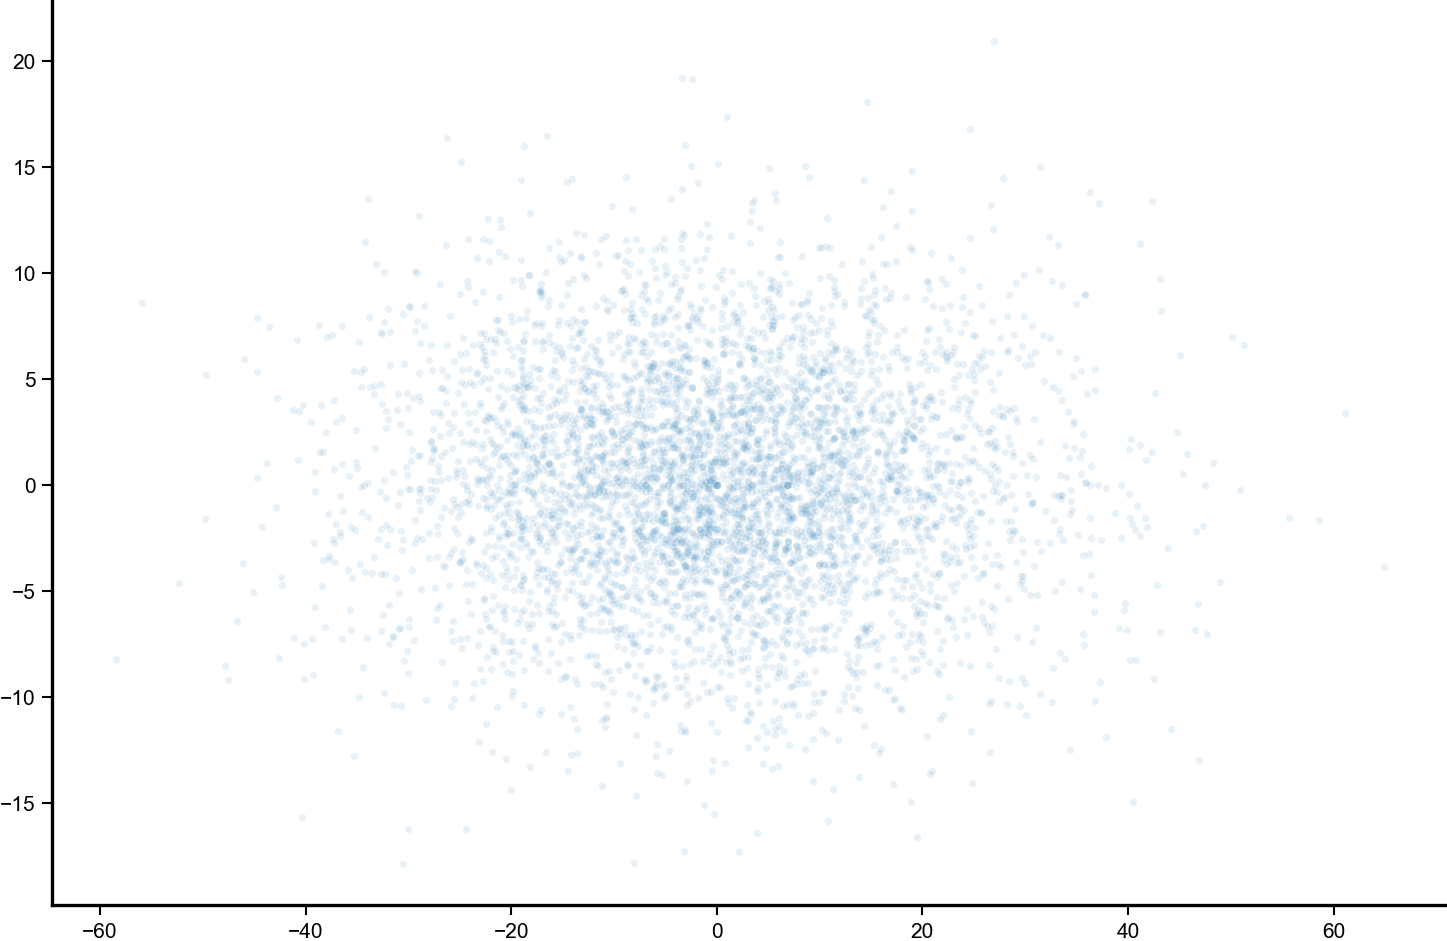

In [112]:
plt.scatter(coef[1], coef[2], lw=0, s=3, alpha=.1)

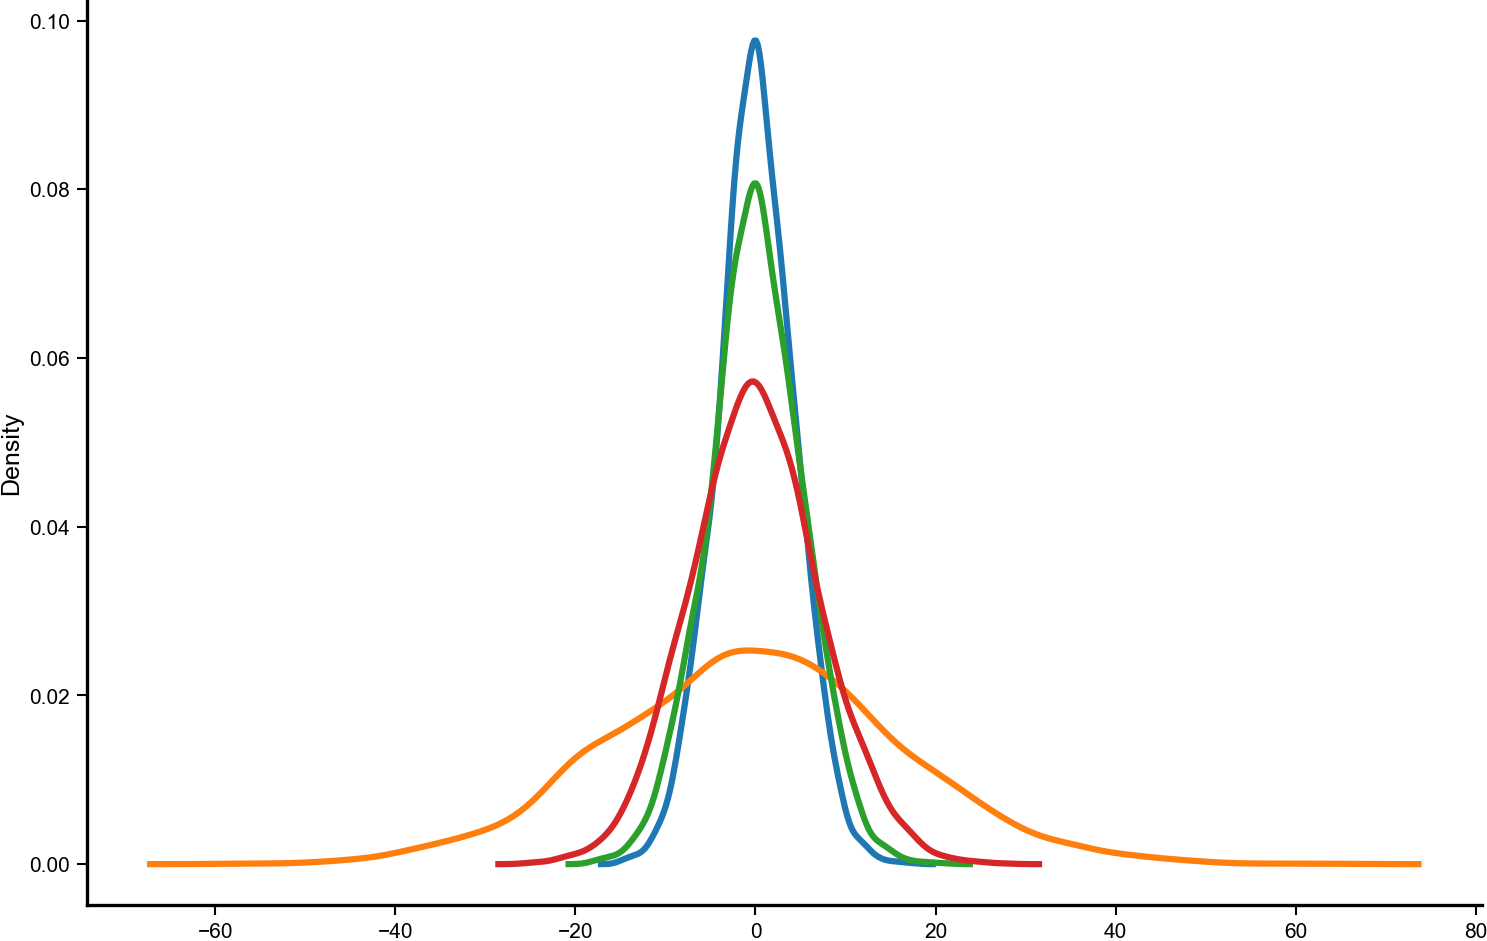

In [109]:
sns.kdeplot(coef[0])
sns.kdeplot(coef[1])
sns.kdeplot(coef[2])
sns.kdeplot(coef[3])

## Can we get rid of the polynomials?

In [219]:
def uniform_random_walk(length=100, max_step=20):
    contour = [np.random.randint(-max_step,max_step+1)]
    for i in range(1, length):
        step = np.random.randint(-max_step, max_step+1)
        contour.append(contour[i-1] + step)
    return np.array(contour)

In [220]:
contours2 = np.array([uniform_random_walk(50) for _ in range(3000)])
contours2 = contours2 - contours2.mean(axis=1)[:, np.newaxis]

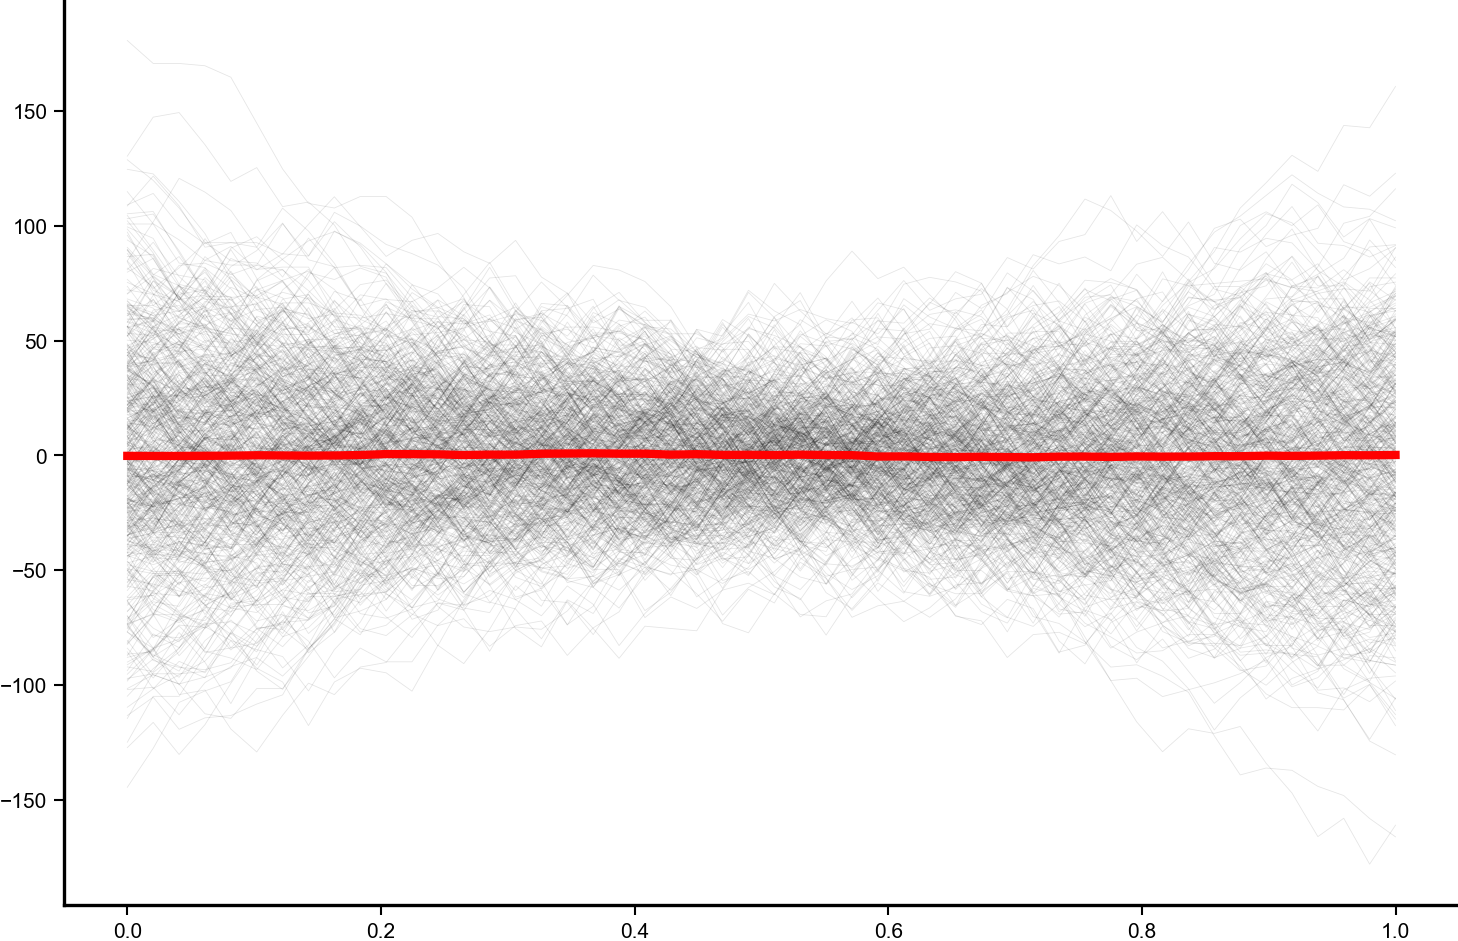

In [221]:
xs = np.linspace(0, 1, contours2.shape[1])
plt.plot(xs, contours2[:500,:].T, 'k', lw=.2, alpha=.1)
plt.plot(xs, contours2.mean(axis=0), 'r', lw=2);

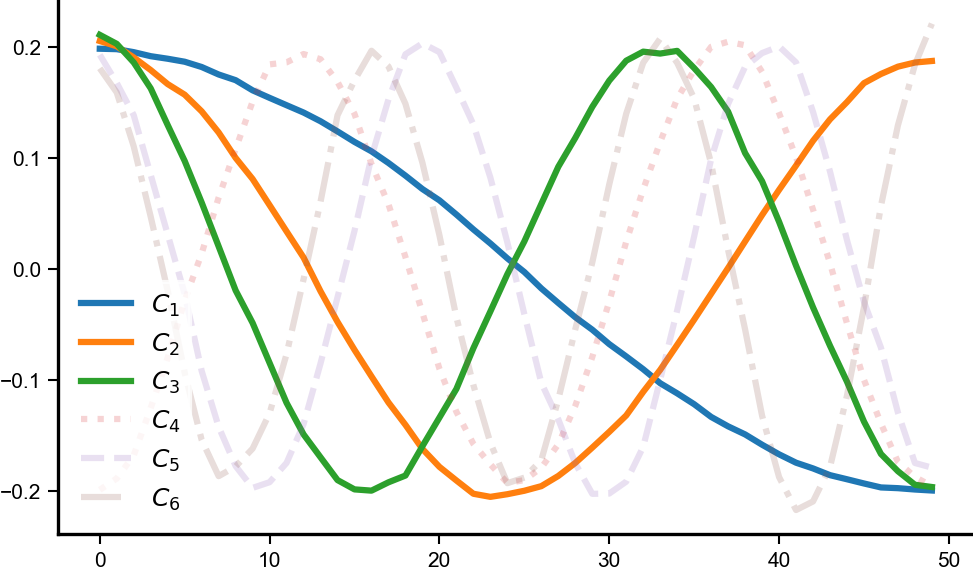

In [222]:
pca = PCA(n_components=9)
pca.fit(contours2)
plt.figure(figsize=cm2inch(10,6))
plt.plot(pca.components_[0], label='$C_1$')
plt.plot(pca.components_[1], label='$C_2$')
plt.plot(pca.components_[2], label='$C_3$')
plt.plot(pca.components_[3], label='$C_4$', ls=':', alpha=.2)
plt.plot(pca.components_[4], label='$C_5$', ls='--', alpha=.2)
plt.plot(pca.components_[5], label='$C_6$', ls='-.', alpha=.2)
plt.legend()

In [223]:
S = pca.get_covariance()

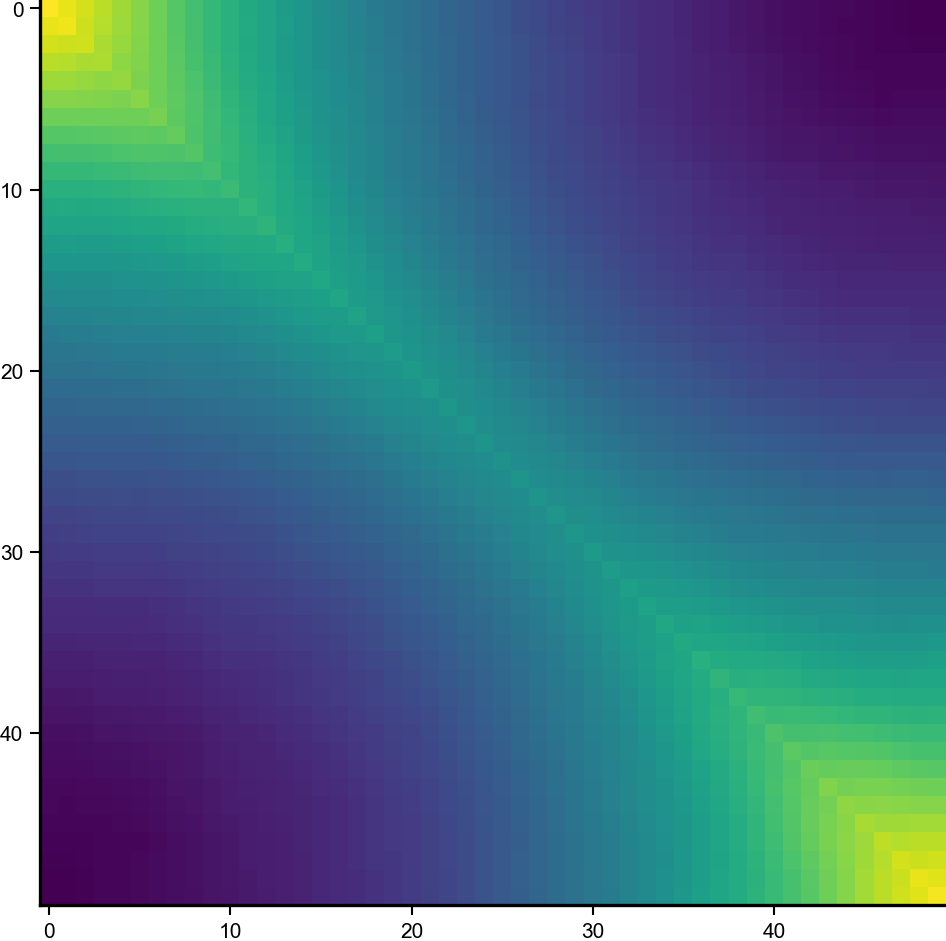

In [224]:
plt.imshow(S)